In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd # cleaning the data
import numpy as np  # for large calculations
import matplotlib.pyplot as plt # matlab
import seaborn as sns
import missingno as msno

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # 0.1
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn import datasets, linear_model
from sklearn import preprocessing

from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# machine learning
# sklearn
# tensorflow


path = '/content/drive/MyDrive/COLLEGE_3RDSEM/data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
# copy the data
df = df.copy()

In [ ]:
print(df)

       Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -3

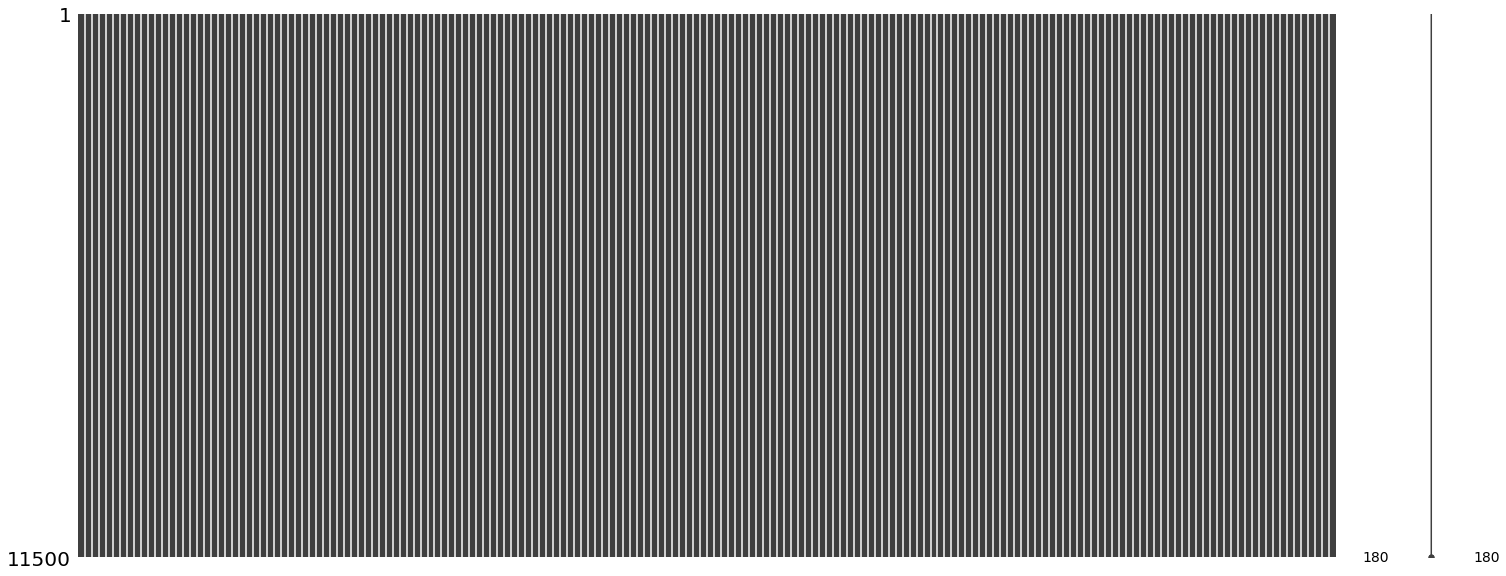

In [ ]:
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
negative_results = len(df[df['y']==0])
positive_results = len(df[df['y']==1])
per_of_negative = negative_results/(negative_results + positive_results)
print("percentage of negative results is", per_of_negative*100)
per_of_positive = positive_results/(negative_results + positive_results)
print("percentage of positive results is", per_of_positive*100)

percentage of negative results is 0.0
percentage of positive results is 100.0


In [ ]:
df["y"].replace({2: 0, 3: 0, 4: 0, 5: 0}, inplace=True)

In [ ]:
df["y"].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [ ]:
df.pop("Unnamed: 0")

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

In [ ]:
X = df.drop(columns=['y'])
X = X.values.reshape(X.shape[0], X.shape[1], 1) 
print(X.shape)
y = df['y'].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=0)
X_test

(11500, 178, 1)


array([[[ -16],
        [  -3],
        [ -16],
        ...,
        [ -16],
        [ -12],
        [ -12]],

       [[ 154],
        [ 144],
        [ 132],
        ...,
        [-401],
        [-437],
        [-357]],

       [[   3],
        [   1],
        [   3],
        ...,
        [  19],
        [  14],
        [  12]],

       ...,

       [[ -34],
        [ -19],
        [ -10],
        ...,
        [  86],
        [ 120],
        [  91]],

       [[ -24],
        [ -43],
        [ -60],
        ...,
        [ -35],
        [ -38],
        [ -35]],

       [[  82],
        [  66],
        [  37],
        ...,
        [  66],
        [  54],
        [  55]]])

In [ ]:
#LSTM
from keras.models import Sequential


Epoch 1/50
112/112 - 15s - loss: 0.3057 - accuracy: 0.8775 - val_loss: 0.1831 - val_accuracy: 0.9406 - 15s/epoch - 135ms/step
Epoch 2/50
112/112 - 11s - loss: 0.1705 - accuracy: 0.9364 - val_loss: 0.1256 - val_accuracy: 0.9641 - 11s/epoch - 101ms/step
Epoch 3/50
112/112 - 11s - loss: 0.1421 - accuracy: 0.9524 - val_loss: 0.1469 - val_accuracy: 0.9397 - 11s/epoch - 100ms/step
Epoch 4/50
112/112 - 11s - loss: 0.1242 - accuracy: 0.9596 - val_loss: 0.1082 - val_accuracy: 0.9632 - 11s/epoch - 100ms/step
Epoch 5/50
112/112 - 12s - loss: 0.1094 - accuracy: 0.9602 - val_loss: 0.1100 - val_accuracy: 0.9568 - 12s/epoch - 106ms/step
Epoch 6/50
112/112 - 11s - loss: 0.0996 - accuracy: 0.9665 - val_loss: 0.0903 - val_accuracy: 0.9704 - 11s/epoch - 102ms/step
Epoch 7/50
112/112 - 12s - loss: 0.0996 - accuracy: 0.9653 - val_loss: 0.0891 - val_accuracy: 0.9670 - 12s/epoch - 108ms/step
Epoch 8/50
112/112 - 12s - loss: 0.0873 - accuracy: 0.9711 - val_loss: 0.0808 - val_accuracy: 0.9730 - 12s/epoch - 103

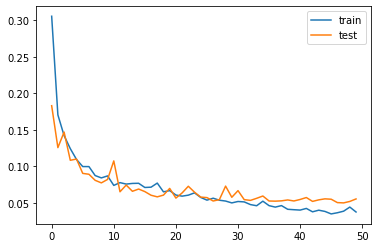

In [ ]:
from keras.layers import Dense, Dropout
from keras.layers import LSTM
# When i designed the network, Basically i used heuristic approach
X_train=np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
X_test=np.array(X_test).reshape(X_test.shape[0],X_test.shape[1],1)
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()